# Сборный проект:  успешность игры, закономерности.

## Описание проекта:

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. 

#### Описание данных games.csv

-   Name — название игры\ 
-   Platform — платформа\ 
-   Year_of_Release — год выпуска\ 
-   Genre — жанр игры\ 
-   NA_sales — продажи в Северной Америке (миллионы долларов)\ 
-   EU_sales — продажи в Европе (миллионы долларов)\ 
-   JP_sales — продажи в Японии (миллионы долларов)\ 
-   Other_sales — продажи в других странах (миллионы долларов)\ 
-   Critic_Score — оценка критиков (от 0 до 100)\ 
-   User_Score — оценка пользователей (от 0 до 10)\ 
-   Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация -     определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.\

*Данные за 2016 год могут быть неполными.

#### План работы:

**Шаг 1. Откройте файл с данными и изучите общую информацию**



**Шаг 2. Подготовьте данные:**
*  Замените названия столбцов (приведите к нижнему регистру);
*  Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
*  Обработайте пропуски при необходимости:  
*  Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Шаг 3. Проведите исследовательский анализ данных:**
*  Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
*  Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
*  Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.
*  Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
*  Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
*  Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. *  Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы. *  Соотнесем выводы с продажами игр на других платформах.
*  Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах?    *  Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4. Составим портрет пользователя каждого региона**

 Определим для пользователя каждого региона (NA, EU, JP):
-   Самые популярные платформы (топ-5). Опишем различия в долях продаж.
-   Самые популярные жанры (топ-5). Поясним разницу.
-   Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверьте гипотезы**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

: 

**Шаг 6. Напишите общий вывод**

## Шаг 1. 

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st


In [9]:
try:
    df = pd.read_csv(r'D:\data_set\games.csv', sep=',')
except:
    df = pd.read_csv( '/datasets/games.csv', sep=',')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Шаг 2. Подготовка данных

#### 2.1 Замените названия столбцов (приведите к нижнему регистру)

In [10]:
df.columns = df.columns.str.lower()

#### 2.2 Преобразуйте данные в необходимый тип.

In [11]:
# year_of_release преобразуем в int 
df.year_of_release = df.year_of_release.convert_dtypes()
# вторым user_score 
print(df['user_score'].loc[df['user_score']=='tbd'].count())
#я заметил, что в данные имеют значение tbd = To Be Determined.Преобразуем их в нужный тип позже, после обработки пропусков
#df.user_score = pd.to_numeric(df.user_score, errors='coerce')

# приведем к нижнему регистру следующие столбцы
for column in df[['name','platform','genre']]:
    df[column] = df[column].str.lower()

df.info()



2424
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


#### 2.2 Обработайте пропуски при необходимости

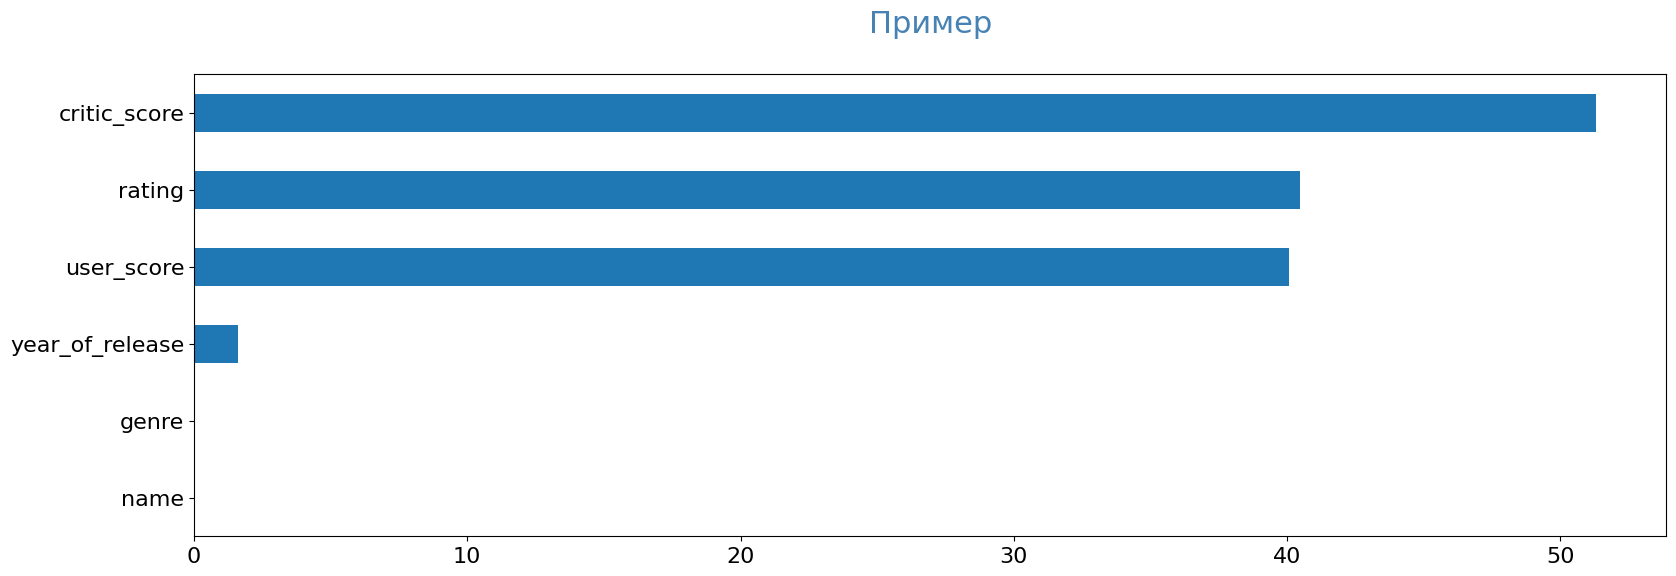

In [12]:
# пропущенные значения 

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')
pass_value_barh(df)

In [14]:
#удалим 2 значения в name 
df.dropna(subset=['name', 'genre'],inplace=True)
pd.isnull(df).sum() 

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [15]:
#как видно, что одна и та же игра, на разных платформах имеет разные строчки, используя это можно, попытаться заполнить часть значений
# пройдемся по индексам пропущенных  и выберем самый поздний год релиза для уверенности что игра точно уже вышла на этой платформе
for i in df[df['year_of_release'].isnull() == True].index:  
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()

In [8]:
#удалим 2 значения в name
df.dropna(how="any", inplace=True,subset=['name', 'genre'])


In [17]:
#вернемся к оценке пользователей
#посмотрим на сколько похожи оценки критиков и пользователей
df_notnan=df.query('critic_score != "NaN" & user_score != "NaN" & user_score != "tbd"')
df_notnan.user_score = pd.to_numeric(df_notnan.user_score, errors='coerce')
df_notnan.user_score = df_notnan.user_score*10
critic_to_user = df_notnan.user_score/df_notnan.critic_score
print(critic_to_user.describe())
# как видно что медиана  и среднее в  оценках совпадают 
# поэтому  все tbd заменим на оценки критиков  
df.loc[df['user_score']=='tbd','user_score']=round(df['critic_score']/10,1)
df.user_score = pd.to_numeric(df.user_score, errors='coerce')

import warnings
warnings.filterwarnings("ignore")


count    8099.000000
mean        1.036953
std         0.206582
min         0.083333
25%         0.945946
50%         1.000000
75%         1.119403
max         3.296296
dtype: float64


In [19]:
#заполним часть пропусков в столбцах оценками критиков и пользователей для строчек, где нет пропусков в двух столбцах 
df_notnan_cs=df.query('critic_score != "NaN"')
df.loc[df['user_score'].isna(),'user_score'] = round(df_notnan_cs['critic_score']/10,1)

#аналогично 
df_notnan_us=df.query('user_score != "NaN"')
df.loc[df['critic_score'].isna(),'critic_score'] = df_notnan_us['user_score']*10


In [20]:
#аналогично 
for i in df[df['critic_score'].isnull() == True].index:  
    df['critic_score'][i] = df.loc[df['name'] == df['name'][i], 'critic_score'].mean()
for i in df[df['user_score'].isnull() == True].index:  
    df['user_score'][i] = df.loc[df['name'] == df['name'][i], 'user_score'].mean()   
warnings.filterwarnings("ignore")

Убрали пропуски в оценках пользователей и критиков. Убрать остальные пропуски у нас нет возможности, оставим так.

In [21]:

#замена рейтинга
df.rating = df.rating.fillna('Unknow')


#### 2.3 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9434 non-null   float64
 9   user_score       9434 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 2.2+ MB


In [14]:
#проверим на дубликаты и количество значений 
print(df.duplicated().sum())
print(df['platform'].value_counts())
print(df['genre'].value_counts())

0
ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
nes       98
gb        98
dc        52
gen       27
ng        12
scd        6
ws         6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64
action          3369
sports          2348
misc            1750
role-playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
Name: genre, dtype: int64


## Шаг 3. Исследовательский анализ данных

#### 3.1 Посмотрим сколько игр выпускалось в разные годы. 

Text(0.5, 1.0, 'Количество игр по годам ')

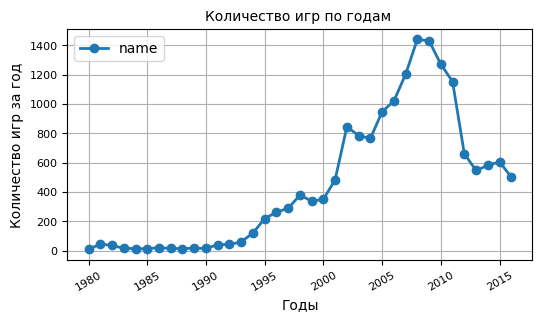

In [23]:
games_by_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_by_years.plot(kind='line',
                   y=['name'],
                    figsize=(6,3),
                    linewidth=2, 
                    fontsize=8,
                    grid=True,
                    marker='o')
plt.xlabel('Годы',fontsize=10)
#plt.xticks (ticks=medain_by_day.index.get_level_values(1))
plt.xticks(rotation=30)
plt.ylabel('Количество игр за год',fontsize=10)
plt.title('Количество игр по годам ',fontsize=10)

Как видно из графика количество игр начиная с 90 годов растет. Скорее всего связано с появлением первых 3д графических процессоров. Основной бум приходиться с 2000 по 2011 годы. Золотая эпоха видео игр

#### 3.2 Посмотрим, как менялись продажи по платформам.

Text(0.5, 1.0, 'Продажи по платформам ')

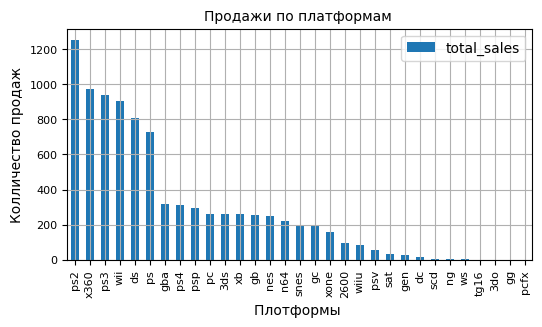

In [24]:
sales_by_plotfom = ( 
    df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(
    by='total_sales', ascending=False)
)
sales_by_plotfom.plot(kind='bar',
                    y='total_sales',
                    figsize=(6,3),
                    linewidth=2, 
                    fontsize=8,
                    grid=True,
                    sharex=False
                    )
#plt.xticks (ticks=sales_by_plotfom.index)
plt.xlabel('Плотформы ',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Колличество продаж',fontsize=10)
plt.title('Продажи по платформам ',fontsize=10) 

По объемам продаж самыми популярными платформами являються :  PS2, X360, PS3, WII, DS, PS.


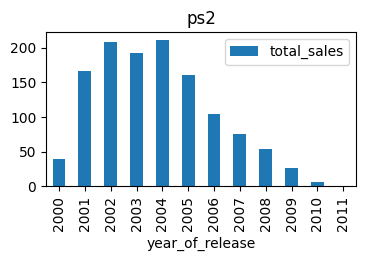

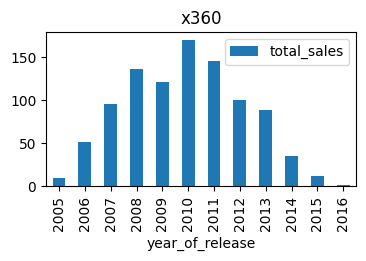

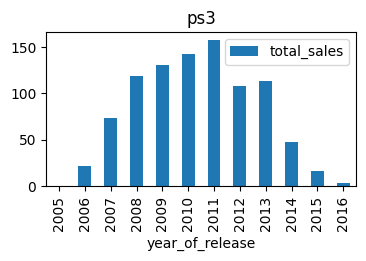

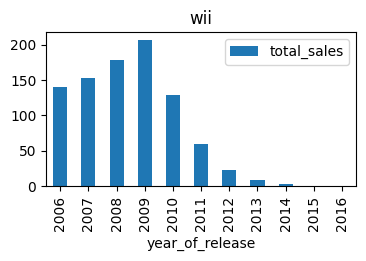

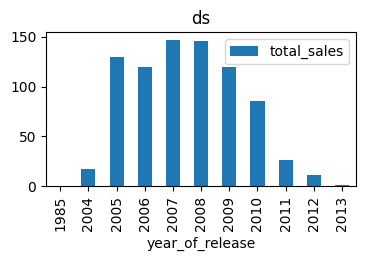

In [25]:
# список платформ с наибольшими суммарными продажами
top6 = list(sales_by_plotfom.index[0:5])
# построим график  продаж по годам для каждой платформы 
for i in top6:
    (
    df[df['platform']==i]
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(4,2))
    )
    plt.title(i)
        

Ориентируясь на графики, можно сделать вывод что в среднем жизненный цикл консоли занимаем около 10 лет. Дальше одно поколение консолей сменяется другим. Основной объём продаж приходиться на середину жизненного цикла.   

#### 3.3  Отберем данные,которые  помогут построить прогноз на 2017 год.

Актуальный период на тот момент, был связан с появлением восьмого поколение игровых приставок берёт своё начало после выхода 27 марта 2011 года портативной консоли Nintendo 3DS.Поэтому для прогнозов будем орентировать на 2011 год 

In [26]:
actual_data =  df[df['year_of_release'] >= 2011]

#### 3.4.Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Text(0.5, 1.0, 'Продажи по платформам ')

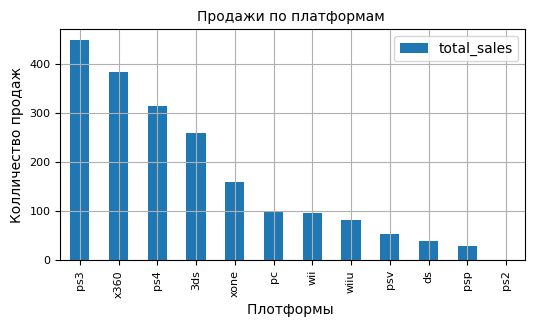

In [27]:
sales_by_plotfom_new = ( 
    actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(
    by='total_sales', ascending=False)
)
sales_by_plotfom_new.plot(kind='bar',
                    y='total_sales',
                    figsize=(6,3),
                    linewidth=2, 
                    fontsize=8,
                    grid=True,
                    sharex=False
                    )
#plt.xticks (ticks=sales_by_plotfom.index)
plt.xlabel('Плотформы ',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Колличество продаж',fontsize=10)
plt.title('Продажи по платформам ',fontsize=10) 

Свой век отживают ps3 и xbox360, потенциальными прибыльные платформы на тот момент -  это  ps4 и xboxone,так же магия nitendo 3ds.

#### 3.5 Сравнение  глобальным продажам игр в разбивке по платформам.

Text(0, 0.5, 'Глобальные продажи')

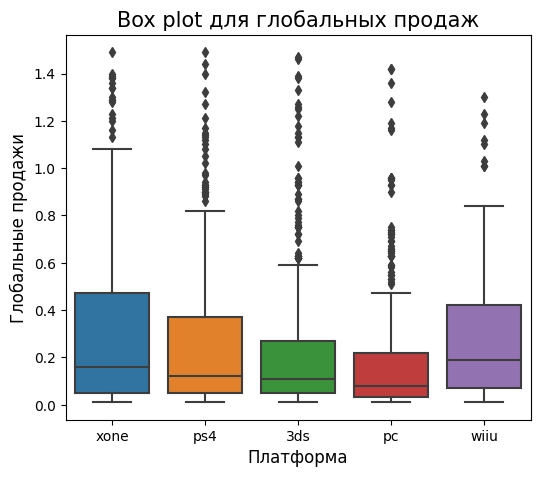

In [28]:
#отберем нужные платформы 
topnew6 = list(sales_by_plotfom_new.index[2:8])
topnew6.pop(-2)
top_6_platforms = (actual_data[actual_data['platform']
                               .isin(topnew6)]
                  )
top_6_platforms = top_6_platforms[top_6_platforms['total_sales'] < 1.5] 
#построим  ящики с усами 
plt.figure(figsize=(6,5))
sns.boxplot(data=top_6_platforms, x='platform', y='total_sales')
plt.title('Box plot для глобальных продаж', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Ящик с усами показывает распределение   для значений продаж по консолям. Но здесь есть особенность, так основную кассу для платформы делают игры, которые попадут либо в выбросы, либо в усы. Исходя из графика можно сделать вывод, что wiiu оппонент xbox. но это не так, хорошо видно по диаграммам по суме продаж. 

#### 3.6 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы

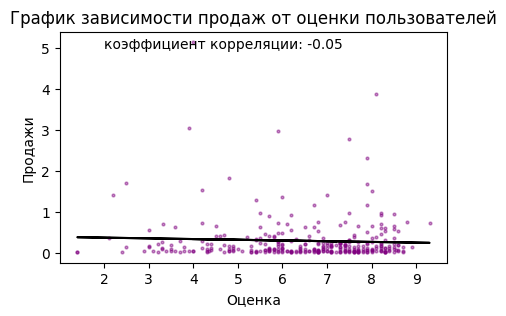

In [29]:
#конечно же я выбрал пк ну не ps4 же
pc = actual_data[actual_data['platform']=='pc']
pc.dropna(inplace=True)  

#строим для пользователей
x = pc['user_score']
y = pc['total_sales']
r = 'коэффициент корреляции: ' + str(round(pc['user_score'].corr(pc['total_sales']), 2))

#график
fig,ax = plt.subplots()
ax.scatter(x, y,
           color = 'purple',
           s = 4,
           alpha = 0.45)
ax.set_title('График зависимости продаж от оценки пользователей')

#функция для регрессионной прямой
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='black')


fig.set_figwidth(5)
fig.set_figheight(3)

plt.text (2, 5, r)
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.show()

warnings.filterwarnings("ignore")

Как видно из графика, продажи не связаны с оценкой пользователей.Очень низкая корреляция 

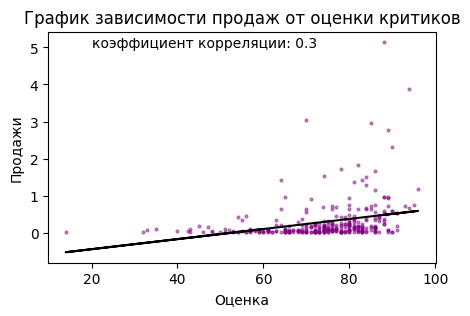

In [30]:
#строим для пользователей
x = pc['critic_score']
y = pc['total_sales']
r = 'коэффициент корреляции: ' + str(round(pc['critic_score'].corr(pc['total_sales']), 2))

#график
fig,ax = plt.subplots()
ax.scatter(x, y,
           color = 'purple',
           s = 4,
           alpha = 0.45)
ax.set_title('График зависимости продаж от оценки критиков')

#функция для регрессионной прямой
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='black')


fig.set_figwidth(5)
fig.set_figheight(3)

plt.text (20, 5, r)
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.show()

Как видно, оценки критиков чуть лучше предсказывают продажи, ну или критики, своими рецензиями их подстегивают.Плохая взаимосвязь оценок пользователей с продажами, может быть связана не только с игрой как таковой, а с ее техническим состоянием, маркетингом, наличием лутбоксов или пользователь просто не дошел до главного ядра геймплея, забросил раньше и тд. Оценка поставлена, а игра пропятилась или довели механику до ума.Хоть у критиков все таки взаимосвязь больше,но все еще не высока.


#### 3.7 Соотнесите выводы с продажами игр на других платформах.

Text(0.5, 1.0, 'корреляция оценок пользователей и критиков с колличеством продаж по платформам')

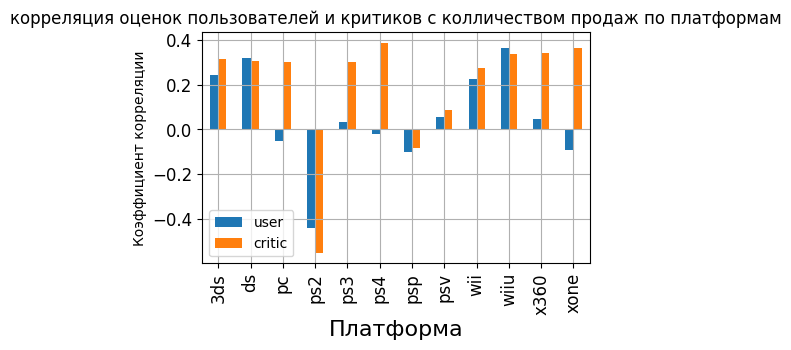

In [31]:
corr_data_cs = (actual_data
                .groupby('platform')[['critic_score','total_sales']]
                .corr()
                .unstack()
                .iloc [:, 1 ]
                .to_frame (name='critic')
               )
corr_data_us = (actual_data
                .groupby('platform')[['user_score','total_sales']]
                .corr()
                .unstack()
                .iloc [:, 1 ]
                .to_frame (name='user')
               )
corr_data = pd.concat([corr_data_us,corr_data_cs], axis= 1 )
corr_data.plot(kind='bar',
                   y=['user','critic'],
                    figsize=(5,3),
                    fontsize=12,
                    grid=True,
                    )
plt.xlabel('Платформа',fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Коэффициент корреляции',fontsize=10)
plt.title('корреляция оценок пользователей и критиков с колличеством продаж по платформам',fontsize=12)


*Аналогичная ситуация и на других платформах. В среднем корреляция  между оценками критиков и количеством продаж  на популярных платформах составляет около 0.3.Для оценок пользователей либо ее вообще нет, либо аналогична оценки критиков*

#### 3.8 Общее распределение игр по жанрам

Index(['action', 'shooter', 'role-playing', 'sports', 'misc', 'platform',
       'racing', 'fighting', 'simulation', 'adventure', 'strategy', 'puzzle'],
      dtype='object', name='genre')

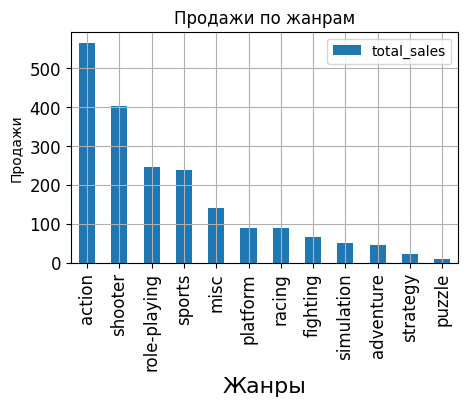

In [32]:
genre_data = (actual_data
              .pivot_table(index='genre', values='total_sales', aggfunc='sum')
              .sort_values(by='total_sales', ascending=False)
             )
              
             
genre_data.plot(kind='bar',
                    y=['total_sales'],
                    figsize=(5,3),
                    fontsize=12,
                    grid=True,
                    )
plt.xlabel('Жанры',fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Продажи',fontsize=10)
plt.title('Продажи по жанрам',fontsize=12) 
genre_data.index

Text(0, 0.5, 'Глобальные продажи')

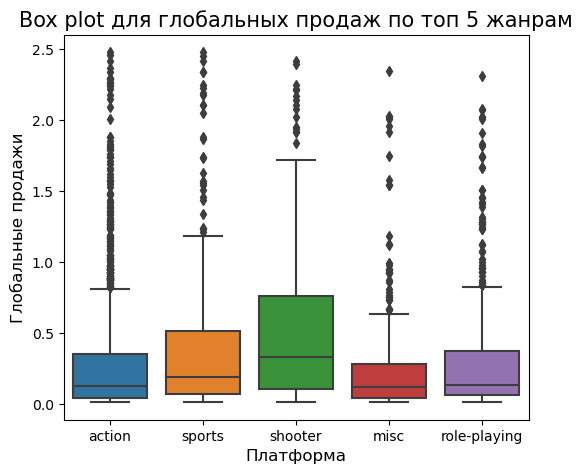

In [52]:
top5genre= list(genre_data.index[:5])
top_5_genre = (actual_data[actual_data['genre']
                               .isin(top5genre)]
              )
top_5_genre = top_5_genre[top_5_genre.total_sales<2.5]
plt.figure(figsize=(6,5))
sns.boxplot(data=top_5_genre, x='genre', y='total_sales')
plt.title('Box plot для глобальных продаж по топ 5 жанрам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

В явных лидерах жанр шутеров, самая высокая медиана. Не мудрено, по мимо call of duty и battlefild, есть тысяча и один шутер со своей аудиторией. В свое время мне нравилась Red Orchestra 2: Heroes of Stalingrad. Сразу же за шутерами идет жанр спорт, ежегодные FIFA и NHL, далее почти с равным результатом экшены и ролевые игры. Стоит все-таки отметить, что у экшенов больше выбросов, следовательно больше хитов, но чуточку ниже медиана. Замыкает список разное, с медианной на уровне экшенов, но меньшим разбросом 

Text(0, 0.5, 'Глобальные продажи')

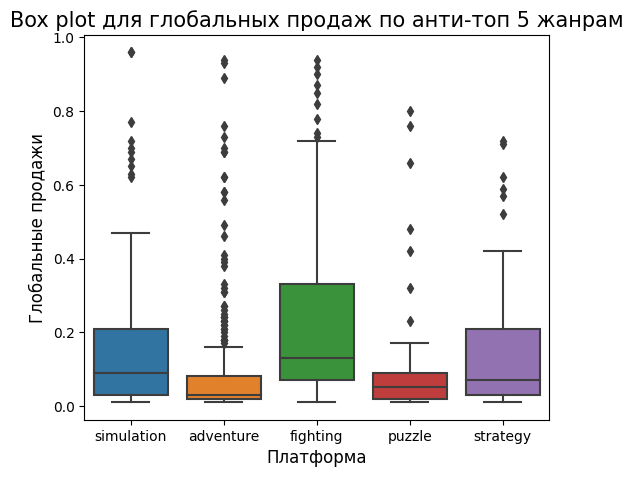

In [33]:
top5genre= list(genre_data.index[7:13])
top_5_genre = (actual_data[actual_data['genre']
                               .isin(top5genre)]
              )
top_5_genre = top_5_genre[top_5_genre.total_sales<1]
plt.figure(figsize=(6,5))
sns.boxplot(data=top_5_genre, x='genre', y='total_sales')
plt.title('Box plot для глобальных продаж по анти-топ 5 жанрам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Для анти топа, хуже всего дела обстоят у приключений, медиана чуть выше нуля, с плохим результатом идут так же пазлы, а вот у симуляторов и стратегий дела обстоят стабильно, вообще это специфичные нишевые жанры, как в прошлом любитель глобальных стратегий, скажу, если человек играет хоть в одну игру из жанра затем он играет во все. Наверное, аналогично с симуляторами. Больше всего продаж и самая высокая медиана,а так же и  выбросы у файтингов 

## Шаг 4. Портрет пользователя каждого региона

### 4.1 Самые популярные платформы (топ-5).

#### Северная Америка

Index(['x360', 'ps3', 'ps4', 'xone', '3ds', 'wii', 'wiiu', 'pc', 'ds', 'psv',
       'psp', 'ps2'],
      dtype='object', name='platform')

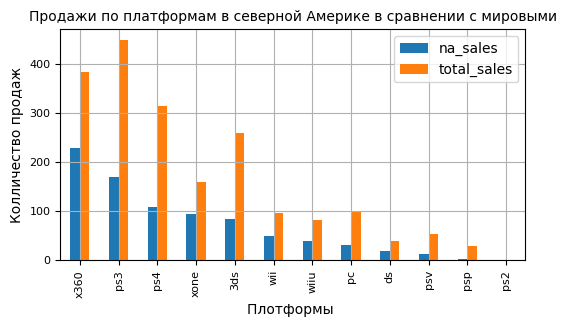

In [34]:
na_platform = (actual_data
               .pivot_table(index='platform', values=['na_sales','total_sales'], aggfunc='sum')
               .sort_values(by='na_sales', ascending=False)
)
na_platform.plot(kind='bar',
                    y=['na_sales','total_sales'],
                    figsize=(6,3),
                    linewidth=2, 
                    fontsize=8,
                    grid=True,
                    sharex=False
                    )

plt.xlabel('Плотформы ',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Колличество продаж',fontsize=10)
plt.title('Продажи по платформам в северной Америке в сравнении с мировыми',fontsize=10) 
na_platform.index

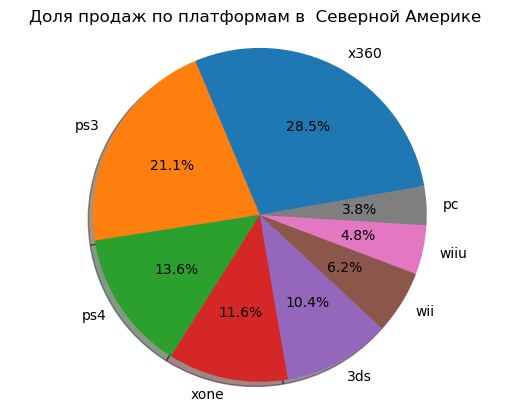

In [28]:
y = na_platform['na_sales'].head(8)
fig1, ax1 =  plt.subplots()
ax1.pie(y,
        autopct='%1.1f%%',
        shadow=True,
        labels=na_platform.head(8).index, 
        startangle=10)


ax1.axis('equal')  
plt.title('Доля продаж по платформам в  Северной Америке ',fontsize=12)
plt.show()


Традициионо Традиционно в северной Америке занимает лидерство xbox360,на его долю приходиться до 30% рынка по в платформам в северной Америке и почти половина в мировых продажах на xbox360. На втором месте ожидаемо оппонент старого поколения ps3 c 21%, но наибольший интерес для нас представляет 3 место и ps4,так как Северная Америка считается регионом лояльным Microsoft и xbox,ps4 занимает почти 14% рынка, а xbox только 12%.Но на Америку приходиться почти половина продаж xbox,а на ps4 только треть от мировых. Конечно же, магия Nintendo и 3ds занимает 5 место по объёмам продаж.

#### Европа

Index(['ps3', 'ps4', 'x360', '3ds', 'pc', 'xone', 'wii', 'wiiu', 'psv', 'ds',
       'psp', 'ps2'],
      dtype='object', name='platform')

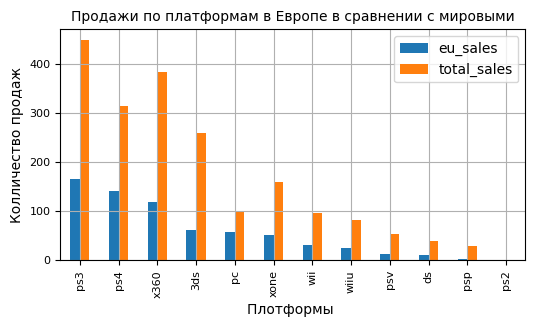

In [35]:
eu_platform = (actual_data
               .pivot_table(index='platform', values=['eu_sales','total_sales'], aggfunc='sum')
               .sort_values(by='eu_sales', ascending=False)
)
eu_platform.plot(kind='bar',
                    y=['eu_sales','total_sales'],
                    figsize=(6,3),
                    linewidth=2, 
                    fontsize=8,
                    grid=True,
                    sharex=False
                    )

plt.xlabel('Плотформы ',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Колличество продаж',fontsize=10)
plt.title('Продажи по платформам в Европе в сравнении с мировыми',fontsize=10) 
eu_platform.index

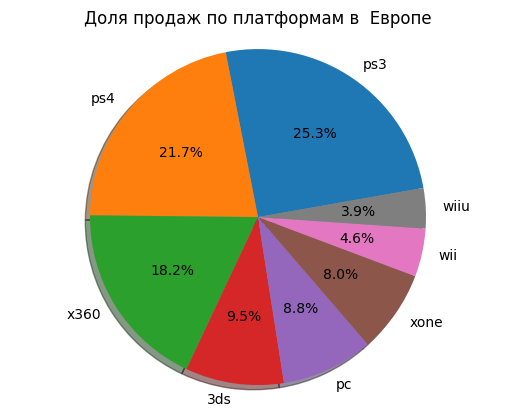

In [36]:
y = eu_platform['eu_sales'].head(8)
fig1, ax1 =  plt.subplots()
ax1.pie(y,
        autopct='%1.1f%%',
        shadow=True,
        labels=eu_platform.head(8).index, 
        startangle=10)


ax1.axis('equal')  
plt.title('Доля продаж по платформам в  Европе',fontsize=12)
plt.show()

А вот в Европе победа за ps4, обогнав по доле рынка даже ветерана консольных воин xbox360. Также за ps4 в европейском регионе больше трети продаж от общемировых на этой же платформе.3ds занимает 4 место и ПК закрывает топ 5, кстати, на Европу приходиться больше половины от мировых продаж на ПК. Невозможно никак по-другому объяснить, как через аристократический дух европейцев, который берет свое начало в античной Греции. А вот xbox1 не вошел в пятерку лидеров

#### Япония

Index(['3ds', 'ps3', 'psp', 'psv', 'ps4', 'wiiu', 'wii', 'ds', 'x360', 'xone',
       'ps2', 'pc'],
      dtype='object', name='platform')

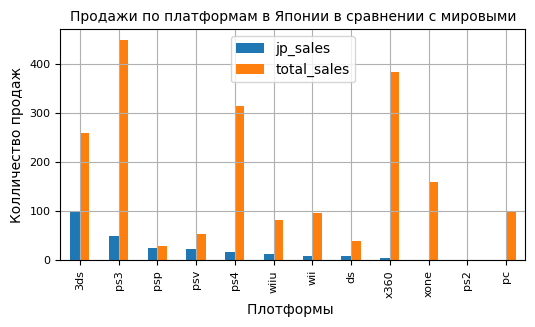

In [37]:
jp_platform = (actual_data
               .pivot_table(index='platform', values=['jp_sales','total_sales'], aggfunc='sum')
               .sort_values(by='jp_sales', ascending=False)
)
jp_platform.plot(kind='bar',
                    y=['jp_sales','total_sales'],
                    figsize=(6,3),
                    linewidth=2, 
                    fontsize=8,
                    grid=True,
                    sharex=False
                    )

plt.xlabel('Плотформы ',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Колличество продаж',fontsize=10)
plt.title('Продажи по платформам в Японии в сравнении с мировыми',fontsize=10)
jp_platform.index

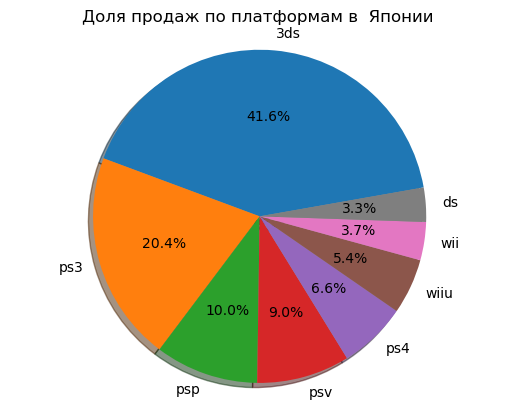

In [32]:
y = jp_platform['jp_sales'].head(8)
fig1, ax1 =  plt.subplots()
ax1.pie(y,
        autopct='%1.1f%%',
        shadow=True,
        labels=jp_platform.head(8).index, 
        startangle=10)


ax1.axis('equal')  
plt.title('Доля продаж по платформам в  Японии',fontsize=12)
plt.show()

В Японии своя атмосфера, до 41,6% рынка занимает 3ds и треть от мирового. Так же на такие портативные консоли как psp и psv приходиться в сумме почти 20% - своя культура. Второе место занимает ps3 c 20% и замыкает список ps4 c 6,6%.Ни пк, ни один из xbox не вошли даже в топ 8.Очень специфичный рынок

### 4.2 Самые популярные жанры (топ-5).

#### Северная Америка

Index(['action', 'shooter', 'sports', 'role-playing', 'misc', 'platform',
       'racing', 'fighting', 'simulation', 'adventure', 'strategy', 'puzzle'],
      dtype='object', name='genre')

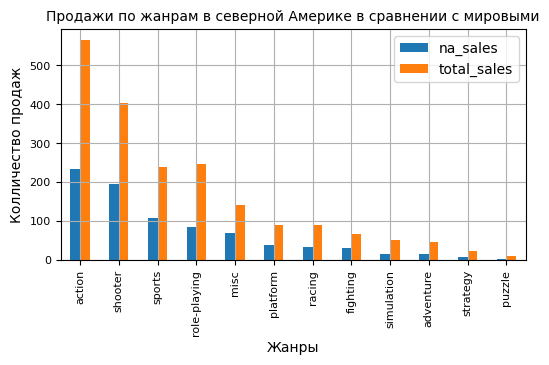

In [33]:
na_platform = (actual_data
               .pivot_table(index='genre', values=['na_sales','total_sales'], aggfunc='sum')
               .sort_values(by='na_sales', ascending=False)
)
na_platform.plot(kind='bar',
                    y=['na_sales','total_sales'],
                    figsize=(6,3),
                    linewidth=2, 
                    fontsize=8,
                    grid=True,
                    sharex=False
                    )

plt.xlabel('Жанры',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Колличество продаж',fontsize=10)
plt.title('Продажи по жанрам в северной Америке в сравнении с мировыми',fontsize=10)
na_platform.index

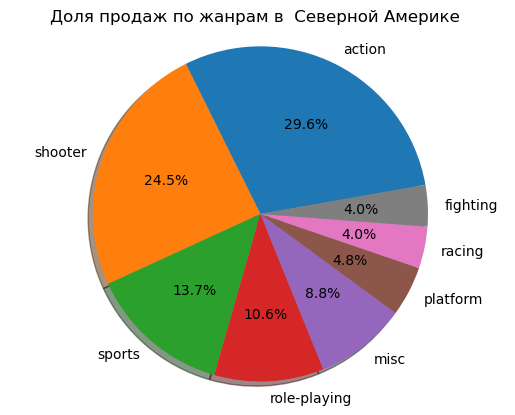

In [34]:
y = na_platform['na_sales'].head(8)
fig1, ax1 =  plt.subplots()
ax1.pie(y,
        autopct='%1.1f%%',
        shadow=True,
        labels=na_platform.head(8).index, 
        startangle=10)


ax1.axis('equal')  
plt.title('Доля продаж по жанрам в  Северной Америке ',fontsize=12)
plt.show()


В северной Америке лидерство держат экшены и шутеры, название call of duty и gta вам о чем-нибудь говорит?) Причем Америка в экшенах занимает треть от мировых продаж, а в шутерах половину.3 место за спортивными симуляторами и почти половина от мировых продаж симуляторов.4 ролевые игры – скорее всего иметься ввиду рпг; великий пророк Тод Говард взял у каждого по консоли и даровал каждому по Скайриму. Закрывает топ -  разное.

#### Европа


Index(['action', 'shooter', 'sports', 'role-playing', 'racing', 'misc',
       'platform', 'simulation', 'fighting', 'adventure', 'strategy',
       'puzzle'],
      dtype='object', name='genre')

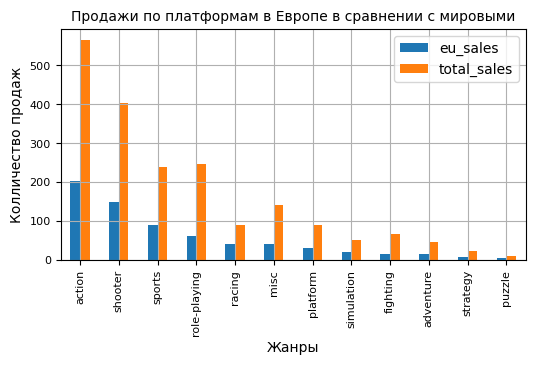

In [35]:
eu_platform = (actual_data
               .pivot_table(index='genre', values=['eu_sales','total_sales'], aggfunc='sum')
               .sort_values(by='eu_sales', ascending=False)
)
eu_platform.plot(kind='bar',
                    y=['eu_sales','total_sales'],
                    figsize=(6,3),
                    linewidth=2, 
                    fontsize=8,
                    grid=True,
                    sharex=False
                    )

plt.xlabel('Жанры',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Колличество продаж',fontsize=10)
plt.title('Продажи по платформам в Европе в сравнении с мировыми',fontsize=10)
eu_platform.index

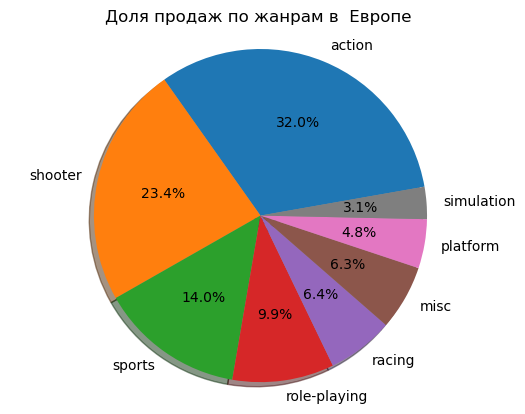

In [36]:
y = eu_platform['eu_sales'].head(8)
fig1, ax1 =  plt.subplots()
ax1.pie(y,
        autopct='%1.1f%%',
        shadow=True,
        labels=eu_platform.head(8).index, 
        startangle=10)


ax1.axis('equal')  
plt.title('Доля продаж по жанрам в  Европе',fontsize=12)
plt.show()

Европейский рынок аналогичен американском, только занимает меньшую долю от общемирового и в Европе замыкает топ 5 гонки а не разное.

#### Япония 

Index(['role-playing', 'action', 'misc', 'fighting', 'platform', 'adventure',
       'shooter', 'simulation', 'sports', 'racing', 'strategy', 'puzzle'],
      dtype='object', name='genre')

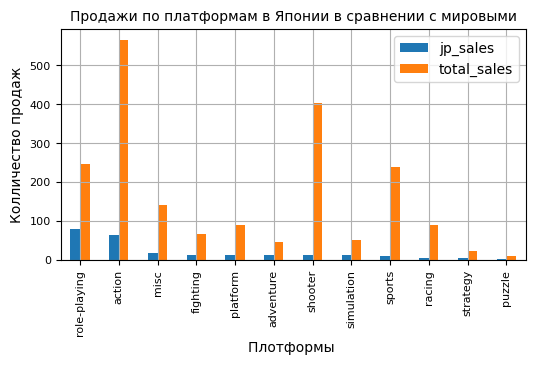

In [37]:
jp_platform = (actual_data
               .pivot_table(index='genre', values=['jp_sales','total_sales'], aggfunc='sum')
               .sort_values(by='jp_sales', ascending=False)
)
jp_platform.plot(kind='bar',
                    y=['jp_sales','total_sales'],
                    figsize=(6,3),
                    linewidth=2, 
                    fontsize=8,
                    grid=True,
                    sharex=False
                    )

plt.xlabel('Плотформы ',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Колличество продаж',fontsize=10)
plt.title('Продажи по платформам в Японии в сравнении с мировыми',fontsize=10)
jp_platform.index

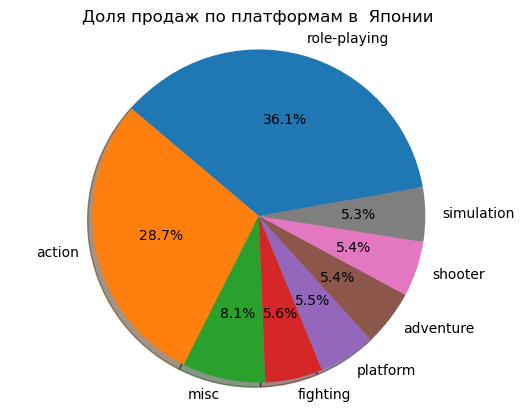

In [38]:
y = jp_platform['jp_sales'].head(8)
fig1, ax1 =  plt.subplots()
ax1.pie(y,
        autopct='%1.1f%%',
        shadow=True,
        labels=jp_platform.head(8).index, 
        startangle=10)


ax1.axis('equal')  
plt.title('Доля продаж по платформам в  Японии',fontsize=12)
plt.show()

В Японии своя атмосфера, первое занимает жанр ролевых игр, скорее всего связано с популярными там jrpg и их портативными платформами. Второе место занимает экшены, затем разное. Четвёртое место за файтингами 8   частей taken и примерно столько же street fighter,оказали влияние на рынок. И замыкает топ главный японско-итальянский водопроводчик, повелитель сердец принцесс Марио и его жанр - платформер


### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

-   RP - Ожидается рейтинг
-   EC - Ранее детство
-   E - Все
-   Е 10+ - все 10+
-   T - подросток
-   M - зрелые
-   A - Взрослый

#### Северная Америка

Index(['M', 'E', 'Unknow', 'E10+', 'T', 'EC', 'RP'], dtype='object', name='rating')

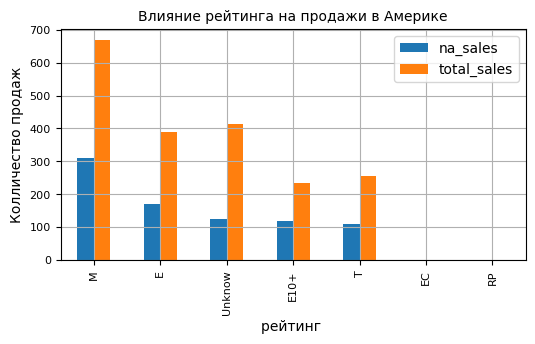

In [39]:
na_rating = (actual_data
               .pivot_table(index='rating', values=['na_sales','total_sales'], aggfunc='sum')
               .sort_values(by='na_sales', ascending=False)
)
na_rating.plot(kind='bar',
                    y=['na_sales','total_sales'],
                    figsize=(6,3),
                    linewidth=2, 
                    fontsize=8,
                    grid=True,
                    sharex=False
                    )

plt.xlabel('рейтинг ',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Колличество продаж',fontsize=10)
plt.title('Влияние рейтинга на продажи в Америке',fontsize=10)
na_rating.index

Большего продаж северной Америке для mature +17,за ним идет 'E' Все, а потом от +10.Не думаю, что рейтинг как-то влияет на продажи, скорее это связано с тем, что у разных регионов разная целевая аудитория, в Америке в топе шутеры и понятно, что ожидаемо, что самой большой группой рейтинг М.К тому же, рейтинг присуждается после выхода игры, не бывает же такого, что игра на пике продаж и присудили рейтинг не соответствующий ЦА и продажи пошли вниз. Выход каждой части gta всегда рейтинговое событие, но меж тем одна из самых продаваемых серий игр

#### Европа

Text(0.5, 1.0, 'Влияние рейтинга на продажи в Европе')

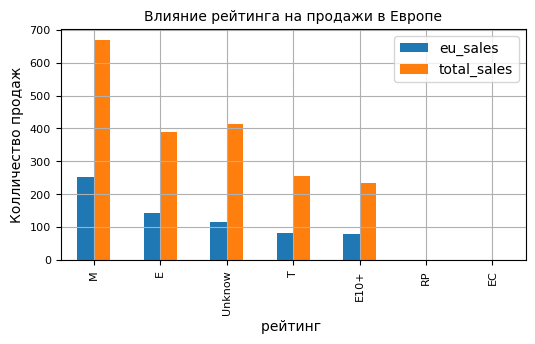

In [40]:
eu_rating = (actual_data
               .pivot_table(index='rating', values=['eu_sales','total_sales'], aggfunc='sum')
               .sort_values(by='eu_sales', ascending=False)
)
eu_rating.plot(kind='bar',
                    y=['eu_sales','total_sales'],
                    figsize=(6,3),
                    linewidth=2, 
                    fontsize=8,
                    grid=True,
                    sharex=False
                    )

plt.xlabel('рейтинг ',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Колличество продаж',fontsize=10)
plt.title('Влияние рейтинга на продажи в Европе',fontsize=10)

Аналогично америке  первое место занимет М,за ним идет для всех Е,затем Т и потом Е10.Тоже скорее всего связано с ЦА и предпочтительными жанрами.

#### Япония


Text(0.5, 1.0, 'Влияние рейтинга на продажи в Япония')

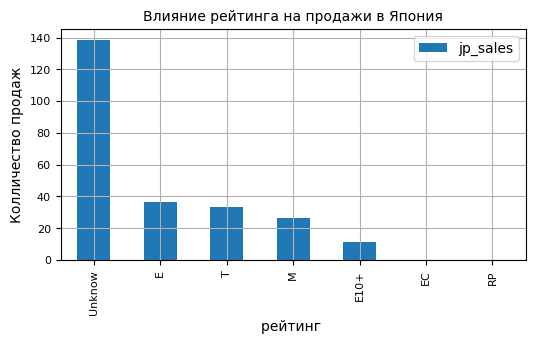

In [41]:
jp_rating = (actual_data
               .pivot_table(index='rating', values=['jp_sales','total_sales'], aggfunc='sum')
               .sort_values(by='jp_sales', ascending=False)
)
jp_rating.plot(kind='bar',
                    y=['jp_sales'],
                    figsize=(6,3),
                    linewidth=2, 
                    fontsize=8,
                    grid=True,
                    sharex=False
                    )

plt.xlabel('рейтинг ',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Колличество продаж',fontsize=10)
plt.title('Влияние рейтинга на продажи в Япония',fontsize=10)


В Японии первое место занимает Е рейтинг и это от части предсказуемое, так главная консоль в Японии 3dc,издатель которой nintendo, позиционирует себя, как производитель игр для всей семьи. За ним идет Т для подростковая только затем М и Е10+.Откровенно я бы не стал ориентироваться на рейтинг при прогнозе успешности продаж игр, так как исходя из рейтинга мы как бы отсекаем часть всей аудитории, но меж тем самые продаваемые игры имеют высокий рейтинговый порог. Но если ориентироваться на графики, то в самых продаваемых игры будут либо с рейтингом М либо с Е


В Еропе и Северной Америке в лидерах М и Е,а затем идет "без рейтинга",в Японии по причинам озвученным выще первое место по количеству проданых копий занимает "без рейтинга",затем Е,а затем Т.

In [42]:
(actual_data
               .pivot_table(index='name', values=['total_sales'], aggfunc='sum')
               .sort_values(by='total_sales', ascending=False)
               .head(10)
 
)

,total_sales
name,
grand theft auto v,56.58
call of duty: modern warfare 3,30.60
call of duty: black ops ii,29.40
call of duty: ghosts,27.39
call of duty: black ops 3,25.67
minecraft,24.16
call of duty: advanced warfare,21.97
the elder scrolls v: skyrim,21.14
fifa 15,17.37


## Шаг 5. Проверка гипотезы

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевые гипотезы:

*   Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
*   Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

З.Ы. по сути у нас вопрос верна ли H₀,так она всегда предполагает равенство средних,так же отберем выборки с датой релиза  Xbox One для PC. 

In [38]:
x_min = actual_data.loc[actual_data['platform']=='xone','year_of_release'].min()

pc_data =(actual_data
          .loc[
          (actual_data['platform']=='pc')
          &(actual_data['year_of_release']>= x_min),
          'user_score']
          .dropna()
         )
xone_data = (actual_data
          .loc[
           actual_data['platform']=='xone',
          'user_score']
          .dropna()
         )
#pc_data.isnull().sum()
#xone_data.isnull().sum()


In [44]:
# посчитаем 
# будем консервативными,так как выборка не большая, для проверки возьмем alpha с запасом 0,01
alpha = .01
results = st.ttest_ind(pc_data, xone_data, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0480156073134174
Не получилось отвергнуть нулевую гипотезу


Как видно p-value не перешагнуло классический порог в 0,05 и мы могли бы получить статистические значимые отличия. Но тут нужно подумать, для чего будут использоваться выводы, если чревато большими потерями, то стоит все-таки использовать порог 0,01. 1/20 не такая уж малая вероятность, то что отличия между двумя средними мы получили случайно.Давайте чуть увиливаем выборку и посмотрим как меняется p-value(увеличить можем только за включение пк из более ранних лет)

In [39]:
pc_data_1 =(actual_data
          .loc[
          (actual_data['platform']=='pc')
          &(actual_data['year_of_release']>= 2011),
          'user_score']
          .dropna()
         )

alpha_1 = .01
results_1 = st.ttest_ind(pc_data_1, xone_data, equal_var=False)
print('p-значение:', results_1.pvalue)
if results_1.pvalue < alpha_1:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.29892996510220243
Не получилось отвергнуть нулевую гипотезу


Как видно, наш консерватизм оправдался. Статистически значимые различия, которые мы могли бы получить, оказались бы случайным.Даже если отбросить статистику и подумать, то Xbox One и PC - это по сути одна платформа(Microsoft все дела),особенно видно теперь с высоты 2023года. 
*  З.Ы. Для проверки конечно же применяли t-test Стьюдента, для сравнения выборочных средних 

#### 5.2 Средние пользовательские рейтинги жанров Action  и Sports  разные.

In [40]:
#аналогично предыдущему отбираем выборку
action_data = (actual_data
          .loc[
              actual_data['genre']=='action',
              'user_score']
          .dropna()
         )
sports_data = (actual_data
          .loc[
              actual_data['genre']=='sports',
              'user_score']
          .dropna()
         )


In [41]:
alpha = .01
results = st.ttest_ind(action_data, sports_data, equal_var=False)
print('p-значение:', f'{results.pvalue:.23f}')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00000000000000000000005
Отвергаем нулевую гипотезу


Как видно, здесь достаточно сильные отличия между оценками пользователей, и мы получили статистики значимые отличия между двумя средними.

## Шаг 6. Напишите общий вывод

**Вывод:**  Как и всегда для анализа данных,   привели к змеиному регистру столбцы и данные. Для некоторых столбцов сменили тип данных. Построив график, мы выяснили, что количество игр, начало расти с большой скоростью с 90х до 2000 года. С 2000 года по 2011 начался золотоя эра видео игр, время за которое вышло наибольшее количество игр. С 2011 по 2013 был значительный спад и с последующим востановлением. Связно это в первую очередь со сменой поколений консолей. В среднем жизненный цикл консоли окло 8-10 лет. За все время самые популярные консоли оказались: PS2, X360, PS3, WII, DS, PS. (из 2023, иронично, что PS4 так и не смогла обогнать по продажам PS2). Пик активных продаж игр на косулях наступает примерно через 5 лет после выпуска консоли. Пользовательские оценки не влияют на продажи игр. Оценки критиков имеют некоторую небольшую взаимосвязь с продажами, предположительно это вызвано, тем что рецензии делают рекламу играм. Топ 5 популярных жанров: action, shooter, role-playing, sports, misc.З амыкают список стратегии и пазлы.



Также мы составили портреты пользователей каждого региона:
-     Северная америка:
Самые популярные игровые платформы: x360, ps3, ps4, xone, 3ds.Старое поколение отживает свой век, а новое набирает обороты, думаю не будет секретом, что самые перспективные платформы: ps4, xone. Топ 5 жанров в северной Америке : action, shooter, sports, role-playing, misc. Gta и call of duty всегда были ориентированы на Северная Америку и судя по продажам, издатели делали правильный выбор. Больше всего проданных игр в Америке с рейтингом М,за ним идет  E, E10+, T.
-     Европа: 
Самые популярные игровые платформы: ps3, ps4, x360, 3ds, pc, xone. Как видно в Европе ps цениться больше, чем xbox.В топ 5 вошел даже ПК. Самые популярные жанры:'action', 'shooter', 'sports', 'role-playing', 'racing'. Аналогично Америке, однако гонки обошли разное. Больше всего проданных игр с рейтингом М за ним идет Е и замыкает ройку лидеров Т
-     Япония: 
Самые популярные игровые платформы в Японии это:'3ds', 'ps3', 'psp', 'psv', 'ps4'.Японцы предпочитают японских издателей и здесь очень популярны портативные консоли. Топ 5 жанров в Японии :'role-playing', 'action', 'misc', 'fighting', 'platform' и топ жанров значительно отличается от Европы и Америки,со своей Японской спецификой. Больше всего продаж приходиться на рейтинг Е, за ним с минимальным разрывом Т и Предположительно это связано, что самая популярная консоль 3ds от Nintendo где большая часть игр это игры для всей семьи.

Если делать прогноз исходя из данных, то наиболее перспективной игрой будет игра в жанре экшен или шутер, для консолей ps4 or xbox.PS4 в большем приоритете так, во всех регионах она обходит xbox. Рейтинг игры должен быть или М или Е. 

Так же мы проверяли гипотезы *"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"* и это действительно так, отвергать H₀ нет оснований, так pvalue не меньше нашего порога alpha.
После проверки гипотезы *"Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"* мы пришли к выводу, средние пользовательские рейтинги жанров в оценке пользователей разные с достаточно высокой статистической значимость поэтому отвергли H₀.
